In [1]:
import pickle as pkl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
infile = open('..//real_estate_data_frame','rb')
frame = pkl.load(infile)
infile.close()

In [3]:
frame

,city,district,localization_y,localization_x,area,sewers,road,fence,water,electricity,gas,price
0,Bełdów-Krzywa Wieś,zgierski,51.835925,19.193010,1004.0,brak,utwardzana,brak,wodociąg w drodze,w drodze,brak,90360.0
1,Stanisławów Nowy,pabianicki,51.801330,19.189772,1200.0,brak,utwardzana,brak,brak,brak,brak,84000.0
2,Julianowo,szczycieński,53.723500,20.867400,1262.0,brak,utwardzana,brak,własne ujęcie/studnia,brak,brak,88340.0
3,Nadarzyn,pruszkowski,52.094000,20.807400,950.0,brak,utwardzana,brak,brak,brak,brak,295000.0
4,Rusiec,pruszkowski,52.065800,20.803900,1160.0,brak,utwardzana,brak,brak,brak,brak,255200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7485,Cholerzyn,krakowski,50.058603,19.773954,1670.0,brak,polna,brak,brak,brak,brak,333000.0
7486,Mogilany,krakowski,49.939618,19.889479,2000.0,brak,polna,brak,brak,brak,brak,360000.0
7487,Nowa Wieś Szlachecka,krakowski,50.026720,19.700051,4400.0,szambo,polna,brak,brak,brak,brak,160000.0
7488,Czernichów,krakowski,49.987773,19.679529,4400.0,brak,polna,brak,brak,brak,brak,440000.0


In [4]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7490 entries, 0 to 7489
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            7490 non-null   object 
 1   district        7490 non-null   object 
 2   localization_y  7490 non-null   float64
 3   localization_x  7490 non-null   float64
 4   area            7490 non-null   float64
 5   sewers          7490 non-null   object 
 6   road            7490 non-null   object 
 7   fence           7490 non-null   object 
 8   water           7490 non-null   object 
 9   electricity     7490 non-null   object 
 10  gas             7490 non-null   object 
 11  price           7490 non-null   float64
dtypes: float64(4), object(8)
memory usage: 702.3+ KB


In [5]:
frame = frame.drop(['district','localization_y','localization_x'],axis=1)

In [6]:
frame['price_of_sqm'] = frame['price']/frame['area']

In [7]:
frame = frame.drop(['price','area'],axis=1)

In [8]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7490 entries, 0 to 7489
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          7490 non-null   object 
 1   sewers        7490 non-null   object 
 2   road          7490 non-null   object 
 3   fence         7490 non-null   object 
 4   water         7490 non-null   object 
 5   electricity   7490 non-null   object 
 6   gas           7490 non-null   object 
 7   price_of_sqm  7490 non-null   float64
dtypes: float64(1), object(7)
memory usage: 468.2+ KB


## creating dummy variables

In [9]:
dummies = pd.get_dummies(frame[['city','sewers','road','fence','water','electricity','gas']],drop_first=True)
frame = frame.drop(['city','sewers','road','fence','water','electricity','gas'],axis=1)
frame = pd.concat([frame,dummies],axis=1)

In [10]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7490 entries, 0 to 7489
Columns: 2697 entries, price_of_sqm to gas_w drodze
dtypes: float64(1), uint8(2696)
memory usage: 19.3 MB


In [11]:
frame

,price_of_sqm,city_Adamowa Góra,city_Adamowizna,city_Adamów-Parcel,city_Adamów-Wieś,city_Adamówek,city_Aleksandria,city_Aleksandrów Kujawski,city_Aleksandrów Łódzki,city_Alwernia,...,fence_metalowe,fence_mieszane,fence_siatka,water_wodociąg na działce,water_wodociąg w drodze,water_własne ujęcie/studnia,electricity_na działce,electricity_w drodze,gas_na działce,gas_w drodze
0,90.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,70.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,70.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,310.526316,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,220.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7485,199.401198,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7486,180.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7487,36.363636,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7488,100.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## train test split

In [12]:
X = frame.drop('price_of_sqm',axis=1).values
y = frame['price_of_sqm'].values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
X_train= scaler.fit_transform(X_train)

In [18]:
X_test = scaler.transform(X_test)

In [19]:
X_train.shape

(5617, 2696)

In [20]:
X_test.shape

(1873, 2696)

## creating model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation ,Dropout
from tensorflow.keras.optimizers import Adam

In [22]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=X_test.shape[1]))
model.add(Dense(64,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               345216    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 353,537
Trainable params: 353,537
Non-trainable params: 0
_________________________________________________________________


In [24]:
# from tensorflow.keras.callbacks import EarlyStopping

In [25]:
# early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [26]:
start = time.time()

model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=256,epochs=300,
#           callbacks=[early_stop],
         )

stop = time.time()
print('\n',(stop-start)//60,'min.')

Train on 5617 samples, validate on 1873 samples
Epoch 1/300
5617/5617 [==============================] - 1s 132us/sample - loss: 108581.9089 - val_loss: 111663.9633
Epoch 2/300
5617/5617 [==============================] - 0s 34us/sample - loss: 107754.0157 - val_loss: 110143.3797
Epoch 3/300
5617/5617 [==============================] - 0s 34us/sample - loss: 105124.4281 - val_loss: 106114.4299
Epoch 4/300
5617/5617 [==============================] - 0s 34us/sample - loss: 99433.0890 - val_loss: 98293.3413
Epoch 5/300
5617/5617 [==============================] - 0s 31us/sample - loss: 89900.1371 - val_loss: 87016.6803
Epoch 6/300
5617/5617 [==============================] - 0s 32us/sample - loss: 77893.0264 - val_loss: 75053.0074
Epoch 7/300
5617/5617 [==============================] - 0s 37us/sample - loss: 67578.9760 - val_loss: 66121.7279
Epoch 8/300
5617/5617 [==============================] - 0s 33us/sample - loss: 61201.7434 - val_loss: 61792.7354
Epoch 9/300
5617/5617 [==========

Epoch 72/300
5617/5617 [==============================] - 0s 40us/sample - loss: 23257.4288 - val_loss: 32734.1787
Epoch 73/300
5617/5617 [==============================] - 0s 40us/sample - loss: 23223.6457 - val_loss: 32620.0653
Epoch 74/300
5617/5617 [==============================] - 0s 40us/sample - loss: 23195.9165 - val_loss: 32755.8853
Epoch 75/300
5617/5617 [==============================] - 0s 40us/sample - loss: 23180.8611 - val_loss: 32758.1762
Epoch 76/300
5617/5617 [==============================] - 0s 40us/sample - loss: 23128.6346 - val_loss: 32734.1055
Epoch 77/300
5617/5617 [==============================] - 0s 40us/sample - loss: 23123.6638 - val_loss: 32744.4589
Epoch 78/300
5617/5617 [==============================] - 0s 40us/sample - loss: 23105.8406 - val_loss: 32736.6735
Epoch 79/300
5617/5617 [==============================] - 0s 44us/sample - loss: 23061.6200 - val_loss: 32818.7867
Epoch 80/300
5617/5617 [==============================] - 0s 40us/sample - loss:

Epoch 143/300
5617/5617 [==============================] - 0s 39us/sample - loss: 21916.2458 - val_loss: 33655.7107
Epoch 144/300
5617/5617 [==============================] - 0s 39us/sample - loss: 21893.2408 - val_loss: 33293.5483
Epoch 145/300
5617/5617 [==============================] - 0s 38us/sample - loss: 21932.2656 - val_loss: 33432.2427
Epoch 146/300
5617/5617 [==============================] - 0s 38us/sample - loss: 21873.0445 - val_loss: 33519.6918
Epoch 147/300
5617/5617 [==============================] - 0s 38us/sample - loss: 21852.5190 - val_loss: 33547.6806
Epoch 148/300
5617/5617 [==============================] - 0s 38us/sample - loss: 21848.0502 - val_loss: 33804.6179
Epoch 149/300
5617/5617 [==============================] - 0s 39us/sample - loss: 21850.5214 - val_loss: 33487.6329
Epoch 150/300
5617/5617 [==============================] - 0s 38us/sample - loss: 21848.4133 - val_loss: 33672.4477
Epoch 151/300
5617/5617 [==============================] - 0s 38us/sampl

5617/5617 [==============================] - 0s 39us/sample - loss: 21247.4301 - val_loss: 33716.1040
Epoch 214/300
5617/5617 [==============================] - 0s 38us/sample - loss: 21258.6924 - val_loss: 33767.8451
Epoch 215/300
5617/5617 [==============================] - 0s 38us/sample - loss: 21256.6834 - val_loss: 33908.6865
Epoch 216/300
5617/5617 [==============================] - 0s 38us/sample - loss: 21231.4793 - val_loss: 33713.5471
Epoch 217/300
5617/5617 [==============================] - 0s 38us/sample - loss: 21234.8876 - val_loss: 33901.9796
Epoch 218/300
5617/5617 [==============================] - 0s 39us/sample - loss: 21219.0560 - val_loss: 33589.0273
Epoch 219/300
5617/5617 [==============================] - 0s 38us/sample - loss: 21209.3671 - val_loss: 33823.5198
Epoch 220/300
5617/5617 [==============================] - 0s 38us/sample - loss: 21186.1911 - val_loss: 33738.2208
Epoch 221/300
5617/5617 [==============================] - 0s 48us/sample - loss: 2121

Epoch 284/300
5617/5617 [==============================] - 0s 40us/sample - loss: 20805.8755 - val_loss: 33634.6859
Epoch 285/300
5617/5617 [==============================] - 0s 39us/sample - loss: 20819.7957 - val_loss: 33517.1946
Epoch 286/300
5617/5617 [==============================] - 0s 38us/sample - loss: 20787.5160 - val_loss: 33501.1031
Epoch 287/300
5617/5617 [==============================] - 0s 39us/sample - loss: 20818.1460 - val_loss: 33495.1277
Epoch 288/300
5617/5617 [==============================] - 0s 38us/sample - loss: 20810.1683 - val_loss: 33918.9600
Epoch 289/300
5617/5617 [==============================] - 0s 38us/sample - loss: 20797.4227 - val_loss: 33726.8538
Epoch 290/300
5617/5617 [==============================] - 0s 38us/sample - loss: 20802.0780 - val_loss: 33368.8202
Epoch 291/300
5617/5617 [==============================] - 0s 39us/sample - loss: 20760.9191 - val_loss: 33994.5380
Epoch 292/300
5617/5617 [==============================] - 0s 38us/sampl

In [27]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

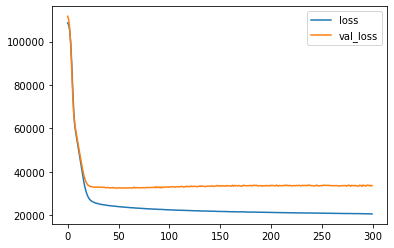

In [28]:
losses.plot()
# plt.ylim(0,20000000000)

## model ewaluation

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [30]:
predictions = model.predict(X_test)

In [31]:
mean_absolute_error(y_test,predictions)

107.35942515735712

In [32]:
np.sqrt(mean_squared_error(y_test,predictions))

183.75324156427598

In [33]:
explained_variance_score(y_test,predictions)

0.5187468301938629

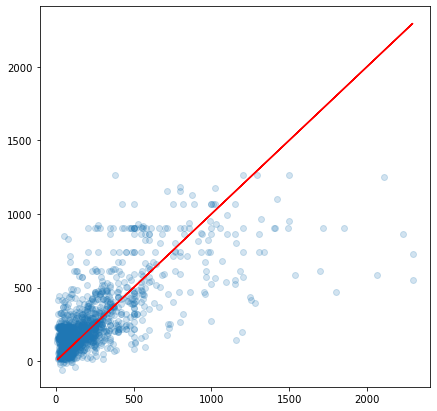

In [34]:
plt.figure(figsize=(7,7))
# plt.xlim(0,3000000)
# plt.ylim(0,3000000)

# Our predictions
plt.scatter(y_test,predictions,edgecolor=None,alpha=0.2)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [35]:
errors = y_test.reshape(y_test.shape[0], 1) - predictions

<AxesSubplot:ylabel='Count'>

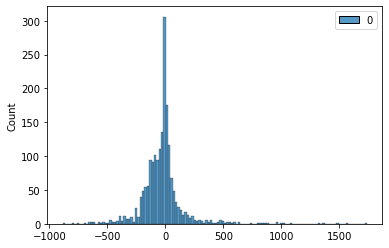

In [36]:
# plt.xlim(-200000,200000)

sns.histplot(errors)

In [37]:
predictions.reshape(y_test.shape[0])[:20]

array([ 183.61108 ,  122.874664,  213.29529 ,  323.68942 ,  175.11217 ,
         51.54433 ,   65.588   ,  120.74494 ,  156.65889 ,  127.018715,
        675.09973 ,  227.80336 ,  205.03917 ,  177.29733 ,   72.7268  ,
       1067.6017  ,   46.752354,  181.65079 ,  126.63965 ,  570.8039  ],
      dtype=float32)

In [38]:
y_test[:20]

array([ 149.06832298,  118.83408072,   51.72413793,  345.2991453 ,
         55.        ,   40.        ,   50.        ,  100.        ,
         89.9122807 ,   19.79166667,  400.28490028,   79.        ,
        120.        ,   40.5643739 ,   20.95459837, 1022.76422764,
         55.        ,  150.        ,  185.        ,  170.06385069])

In [39]:
predictions.reshape(y_test.shape[0])[:20]-y_test[:20]

array([ 34.542761  ,   4.04058359, 161.57115015, -21.60972269,
       120.11216736,  11.5443306 ,  15.58799744,  20.74494171,
        66.74660907, 107.22704824, 274.81483116, 148.80335999,
        85.03916931, 136.73295887,  51.77220064,  44.83745693,
        -8.24764633,  31.65078735, -58.36035156, 400.74004336])

In [40]:
predictions.reshape(y_test.shape[0])[:20]/y_test[:20]

array([1.23172436, 1.03400189, 4.1237089 , 0.93741739, 3.18385759,
       1.28860826, 1.31175995, 1.20744942, 1.74235253, 6.4177877 ,
       1.68654808, 2.88358684, 1.70865974, 4.37076468, 3.47068446,
       1.04383948, 0.85004279, 1.21100525, 0.68453864, 3.35640932])